<a href="https://colab.research.google.com/github/AllieUbisse/machine-learning-Competitions/blob/master/titanic_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
import pandas as pd
import numpy as np

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Loading Data

In [0]:
train_URL = 'https://raw.githubusercontent.com/Data-HAWKS/titanic-competition/master/titanic-competition/train.csv'
test_URL = 'https://raw.githubusercontent.com/Data-HAWKS/titanic-competition/master/titanic-competition/test.csv'
sub_URL = 'https://raw.githubusercontent.com/Data-HAWKS/titanic-competition/master/titanic-competition/gender_submission.csv'

In [0]:
train_df = pd.read_csv(train_URL, index_col='PassengerId')
test_df = pd.read_csv(test_URL,  index_col='PassengerId')
sub_df = pd.read_csv(sub_URL)

# Data Exploration

## Train

In [4]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
train_df.shape

(891, 11)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

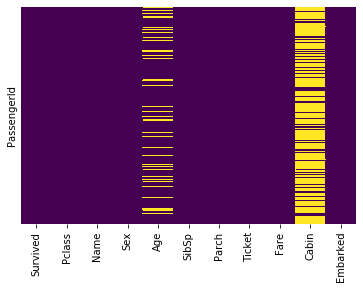

In [20]:
sns.heatmap(data=train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Imputing NAN values
method = mean() 

### Survived countplot

Survived = 1

NOT Survived = 0




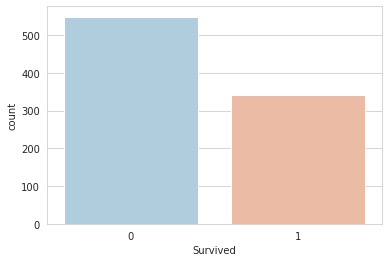

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_df,palette='RdBu_r')

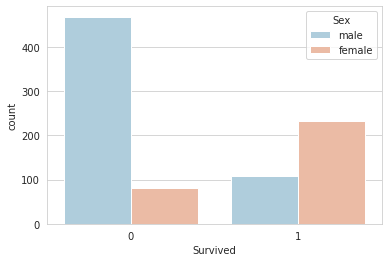

In [34]:
# Survived based on Sex, so we set the parameter hue = 'Sex'
sns.countplot(x='Survived', hue='Sex' ,data=train_df,palette='RdBu_r')

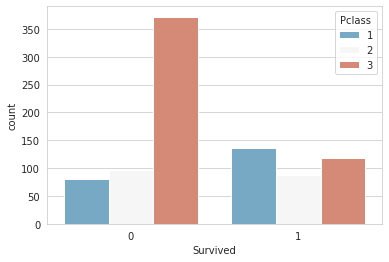

In [35]:
sns.countplot(x='Survived', hue='Pclass' ,data=train_df,palette='RdBu_r')

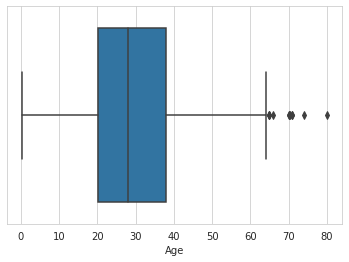

In [38]:
sns.boxplot(x='Age',hue='Sex',data=train_df)

In [0]:
#--